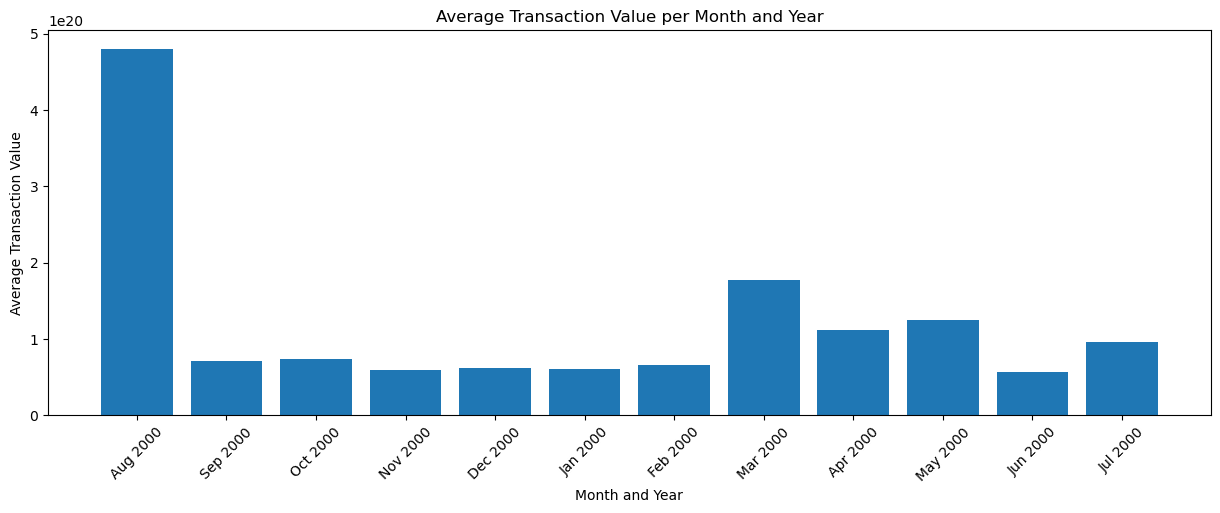

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read data
# Read data
data =["09/2018,3.733481101982521e+18", "06/2017,5.678772230936388e+19", "12/2015,2.6764096183940477e+19", "06/2018,2.8085234163056753e+18", "08/2015,4.8052118459597475e+20", "08/2018,2.3989507981127404e+18", "01/2017,5.620285956535013e+19", "09/2017,3.437211515083117e+19", "10/2017,2.676151521563102e+19", "08/2017,4.827395651885162e+19", "07/2016,9.577823510582162e+19", "12/2016,6.146658677538121e+19", "09/2015,7.046467945767368e+19", "10/2018,3.0704021430259727e+18", "01/2018,1.1164572720750391e+19", "03/2017,1.770215809422216e+20", "12/2018,5.944894163484837e+18", "04/2016,2.2670632047053574e+19", "11/2018,5.397909048901786e+18", "06/2016,3.0490334850064945e+19", "01/2016,6.1066070477195534e+19", "03/2016,4.585306412778079e+19", "03/2018,2.7280798911623885e+18", "07/2017,6.49814637927194e+19", "02/2018,6.230362795090963e+18", "02/2017,5.5580090162629894e+19", "02/2016,6.554760875990387e+19", "10/2016,3.2444426339709256e+19", "07/2018,2.2749347554396426e+18", "10/2015,7.416931809333908e+19", "11/2015,5.94847438624968e+19", "12/2017,1.3731223538323208e+19", "11/2016,3.964431643835121e+19", "09/2016,3.262761224755769e+19", "11/2017,2.9641103274740077e+19", "05/2017,1.2484777365193179e+20", "04/2017,1.113500746219076e+20", "01/2019,4.254789673450596e+18", "05/2016,4.7046609524467696e+19", "08/2016,5.908198737290138e+19", "04/2018,2.449268234852113e+18", "05/2018,2.498190913653176e+18"]

# Split data into months, years, and values
months = []
years = []
values = []
for line in data:
    month_year, value = line.strip().split(",")
    month, year = month_year.split("/")
    months.append(int(month))
    years.append(int(year))
    values.append(float(value))

# Create a dictionary of average transaction values by month and year
averages = {}
for month, year, value in zip(months, years, values):
    if (month, year) not in averages:
        averages[(month, year)] = []
    averages[(month, year)].append(value)

# Calculate the average transaction value for each month and year
averages = {k: sum(v) / len(v) for k, v in averages.items()}

# Sort the data by year and month
averages = sorted(averages.items(), key=lambda x: (x[0][1], x[0][0]))

# Extract the sorted months and values
sorted_months = [datetime.strptime(f"{m}/1/2000", "%m/%d/%Y").strftime("%b %Y") for (m, y) in [k for k, _ in averages]]
sorted_values = [v for (_, v) in averages]

# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Create bar plot
plt.bar(sorted_months, sorted_values)
plt.xlabel("Month and Year")
plt.ylabel("Average Transaction Value")

plt.title("Average Transaction Value per Month and Year")

# Rotate month labels
plt.xticks(rotation=45)


# Save plot to file
plt.savefig("plot.png", bbox_inches='tight')

plt.show()
